<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2024notebooks/2023_0417iris_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* sepal (萼片 がくべん)： 花の外側の部分 (多くの場合緑色で葉のようなもの) で発達中の蕾を包む。
* petal (花弁，花びら)：花の外側の部分で，しばしば目立つ色をしている。

<img src="https://dictionary.goo.ne.jp/img/daijisen/ref/113205.jpg"><br/>
Goo 国語辞典より



In [ ]:
# 必要なライブラリを輸入
import IPython
isColab = 'google.colab' in str(IPython.get_ipython())

import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# # HAD データの取得
# if isColab:
#     !pip install --upgrade xlrd
#     !pip install --upgrade pandas

#     # HAD サンプルデータをダウンロード
#     !wget 'https://files.au-1.osf.io/v1/resources/32cyp/providers/osfstorage/5fb340145502ac018d8c86ab/?zip=' -O had.zip
#     !unzip had.zip

# # HAD のサンプルデータ読み込み
# df = pd.read_excel('HAD_sample_data.xls', sheet_name="iris", index_col='ID')
# df

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(0, "target", iris.target)
#df

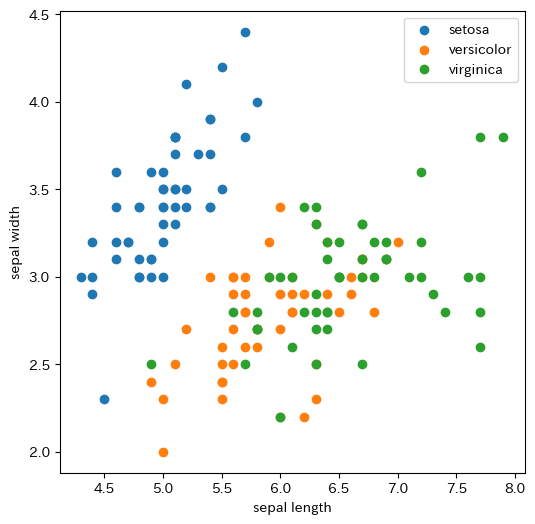

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
#plt.figure(figsize=(6,6))

ax.set_xlabel('sepal length') #, fontsize=11)
ax.set_ylabel('sepal width') #, fontsize=11)
for i in range(len(iris.target_names)):
    ax.scatter(
        x = df['sepal length (cm)'][df['target'] == i],
        y = df['sepal width (cm)'][df['target'] == i],
        label = iris.target_names[i]
    )
plt.legend()
#plt.show()

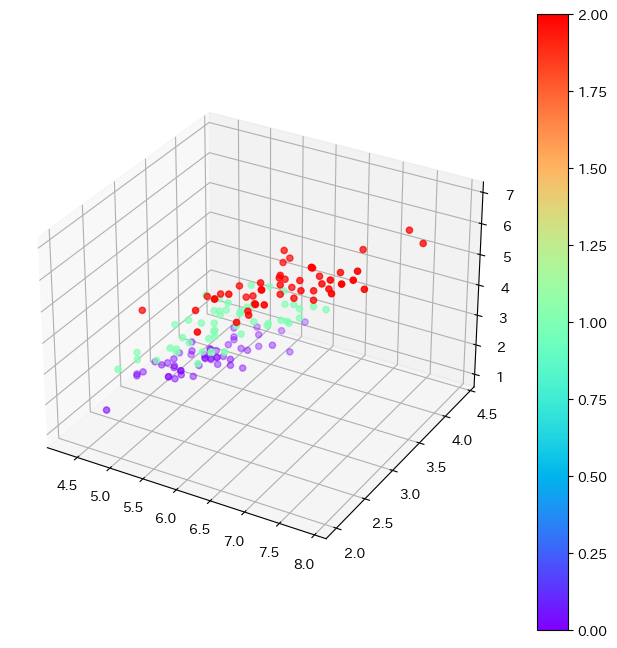

In [8]:
import matplotlib

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

cm = matplotlib.colormaps.get_cmap('rainbow')
#cm = plt.cm.get_cmap('rainbow')
#cm = plt.cm.get_cmap('jet')

# ３次元の散布図を描画。戻り値としてmappableオブジェクトを取得。
scat3d = ax.scatter(
    df['sepal length (cm)'],
    df['sepal width (cm)'],
    df['petal length (cm)'],
    c=df['target'],
    cmap=cm,
)

# カラーバーを描画
fig.colorbar(scat3d, ax=ax)
plt.show()

In [9]:
df

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [10]:
# 説明変数を X とする
X = df.drop('target', axis=1)

# 被説明変数を y とする
y = df['target']

In [11]:
# データセットを訓練データとテストデータに分割
from sklearn.model_selection import train_test_split

# ランダムにデータを訓練用と検証用に振り分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(f'訓練データ:{X_train.shape}, 検証データ:{X_test.shape}')

訓練データ:(120, 4), 検証データ:(30, 4)


In [12]:
# ランダムフォレスト分類器を輸入して，定義
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42,
                                       n_jobs=-1,
                                       max_depth=5,
                                       n_estimators=100,
                                       criterion="entropy",  # ['gini', 'entropy']
                                       oob_score=True)

# oob_score: OOB は out of the bag の意味。
# ランダムフォレストの交差検証法の一つ。
# この方法では，サンプルの 3 分の 1 はデータの訓練に使用されず，代わりに性能の評価に使用される。
# これらのサンプルは out-of-bag サンプルと呼ばれる。

In [13]:
%%time
classifier_rf.fit(X_train, y_train)

# oob 得点の出力
print(f'oob 得点:{classifier_rf.oob_score_}')

oob 得点:0.9166666666666666
CPU times: user 250 ms, sys: 36.5 ms, total: 286 ms
Wall time: 278 ms


In [14]:
# `GridSearchCV` を用いたランダムフォレストのハイパーパラメータチューニング
rf = RandomForestClassifier(random_state=42,
                            n_jobs=-1,
                            criterion='entropy',
                           )
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV
# グリッド探索モデルの実体化
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

In [15]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 2.93 s, sys: 293 ms, total: 3.22 s
Wall time: 1min 46s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [16]:
grid_search.best_score_

0.9500000000000001

In [17]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[3],
          feature_names=X.columns,
          class_names=['1','2','3'],
          filled=True)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],
          feature_names = X.columns,
          class_names=['1','2','3'],
          filled=True)

In [ ]:
rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)